In [1]:
import requests as rq
from bs4 import BeautifulSoup

In [2]:
import pandas as pd

In [3]:
url="https://tfc-taiwan.org.tw/articles/report?page={}"

In [4]:
resp=rq.get(url.format(301))
resp.encoding="utf-8"
resp.status_code

200

In [5]:
soup=BeautifulSoup(resp.text,"lxml")
soup

<!DOCTYPE html>
<html lang="zh-hant">
<head profile="http://www.w3.org/1999/xhtml/vocab">
<title>事實查核報告 | 台灣事實查核中心</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="True" name="HandheldFriendly"/>
<meta content="black" name="apple-mobile-web-app-status-bar-style"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="https://tfc-taiwan.org.tw/sites/default/files/favico.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
<meta content="看見真實，才能打造美好的台灣！本中心參考國外具代表性的事實查核機制，並輔以我國的傳播生態需求，依循專業、透明、公正的原則，執行公共事務相關訊息之事實查核。期能抑制不實資訊的負面影響，提升公眾的資訊素養，裨益台灣的民主發展。" name="description"/>
<meta content="Drupal 7 (https://www.drupal.org)" name="generator"/>
<link href="https://tfc-taiwan.org.tw/articles/report" rel="canonical"/>
<link href="https://tfc-taiwan.org.tw/articles/report" rel="shortlink"/>
<meta content="台灣事實查核中心" property="og:site_name"/>
<meta content="article"

In [6]:
tags=soup.find("div",class_="view-content").find_all("div",class_="views-row")
tags

[<div class="views-row views-row-1 views-row-odd views-row-first entity-row">
 <div class="views-row-inner entity-row-inner">
 <div class="entity-list-img left-pane"> <a href="/articles/608"><img alt="" height="270" src="https://tfc-taiwan.org.tw/sites/default/files/styles/r1d33/public/upload/node/field_blog_images/%E9%8C%AF%E8%AA%A4%E5%85%AC%E7%89%88_0.png?itok=bAwUUFH_" typeof="foaf:Image" width="360"/></a> </div>
 <div class="right-pane views-fieldset" data-module="views_fieldsets">
 <div class="entity-list-tags"><div class="icon-tag 錯誤"><span class="lineage-item lineage-item-level-0"><a href="/articles/category/26/27">錯誤</a></span></div><div class="attr-tag"><a datatype="" href="/taxonomy/term/479" property="rdfs:label skos:prefLabel" typeof="skos:Concept">國際</a></div></div> <h3 class="entity-list-title"><a href="/articles/608">【錯誤】網傳「微波爐加熱食物含輻射，日本政府將全面禁用微波爐 中、韓也跟進」？</a></h3> <div class="entity-list-body">【報告將隨時更新 2021/10/1版】
 
 一、此謠傳的原始出處為《Panorama.pub》網站，該網站文章是諷刺搞笑文，並非真實。
 
 二、日本

In [7]:
tag=tags[4]
tag

<div class="views-row views-row-5 views-row-odd entity-row">
<div class="views-row-inner entity-row-inner">
<div class="entity-list-img left-pane"> <a href="/articles/566"><img alt="" height="270" src="https://tfc-taiwan.org.tw/sites/default/files/styles/r1d33/public/upload/node/field_blog_images/sarah-shull-0z0nT8w_y_o-unsplash.jpg?itok=GZ2osnRX" typeof="foaf:Image" width="360"/></a> </div>
<div class="right-pane views-fieldset" data-module="views_fieldsets">
<div class="entity-list-tags"><div class="icon-tag 部分錯誤"><span class="lineage-item lineage-item-level-0"><a href="/articles/category/26/28">部分錯誤</a></span></div><div class="attr-tag"><a datatype="" href="/taxonomy/term/473" property="rdfs:label skos:prefLabel" typeof="skos:Concept">政治與政策</a></div></div> <h3 class="entity-list-title"><a href="/articles/566">【部分錯誤】網傳「《紐約時報》公布世界最貪腐領袖 陳水扁名列第二」？</a></h3> <div class="entity-list-body">網路近期重新流傳《紐約時報》2016年2月16日的舊報導，原文報導為〈掌權者，盜款數以百萬計〉，指出美國司法部當時致力追回外國政治人物竊取而在美國洗錢的資產，介紹五個當時正在追查的個案。但原文報導並未進行

In [8]:
link="https://tfc-taiwan.org.tw"+tag.find("a").get("href")
link

'https://tfc-taiwan.org.tw/articles/566'

In [9]:
len(tag.find_all('a'))

5

In [10]:
for a in tag.find_all('a'):
    print(a.text.strip(),end='\n--\n')


--
部分錯誤
--
政治與政策
--
【部分錯誤】網傳「《紐約時報》公布世界最貪腐領袖 陳水扁名列第二」？
--
更多
--


- 發現有的新聞沒有news_type，div的數量會無法對上，因此用len()先抓出tagsA的長度，判斷位置是否對上

In [11]:
tagsA=tag.find_all("a")
title=tagsA[-2].text.strip()
result=tagsA[1].text.strip()
if len(tagsA)==5:
    news_type=tagsA[2].text.strip()
else:
    news_type='無'
    
title,news_type,result

('【部分錯誤】網傳「《紐約時報》公布世界最貪腐領袖 陳水扁名列第二」？', '政治與政策', '部分錯誤')

In [12]:
date=tag.find("div",class_="post-date").text.split("：")[-1]
date

'2019-06-12'

In [13]:
datas=[]
pages=50
for page in range(pages):
    resp=rq.get(url.format(page))
    resp.encoding="utf-8"
    if resp.status_code==200:
        soup=BeautifulSoup(resp.text,"lxml")
        tags=soup.find("div",class_="view-content").find_all("div",class_="views-row")
    else:
        print("error!")
        continue
    
    data=[]
    for tag in tags:
        link="https://tfc-taiwan.org.tw"+tag.find("a").get("href")
        title=tag.find_all("a")[3].text.strip()
        type=tag.find_all("a")[2].text.strip()
        result=tag.find_all("a")[1].text.strip()
        date=tag.find("div",class_="post-date").text.split("：")[-1]
    
        data.append([link,title,type,result,date])
    datas.extend(data)
datas

[['https://tfc-taiwan.org.tw/articles/10805',
  '【易生誤解】網傳「熱天喝冷飲恐導致上食道出血」？',
  '健康',
  '錯誤',
  '2024-07-17'],
 ['https://tfc-taiwan.org.tw/articles/10804',
  '【錯誤】網傳照片「川普其實中兩槍，胸口也中一槍，只是有穿防彈衣」？',
  '國際',
  '錯誤',
  '2024-07-16'],
 ['https://tfc-taiwan.org.tw/articles/10803',
  '【錯誤】網傳圖片「戴毛帽、墨鏡的男子是槍擊川普的兇手」？',
  '國際',
  '錯誤',
  '2024-07-16'],
 ['https://tfc-taiwan.org.tw/articles/10802',
  '【錯誤】網傳「倒楣熊開山鼻祖，白化症棕熊喬伊被錯送北極」？',
  '國際',
  '錯誤',
  '2024-07-16'],
 ['https://tfc-taiwan.org.tw/articles/10800',
  '【錯誤】網傳照片「藍衣金髮男是試圖槍擊川普的槍手」？',
  '國際',
  '錯誤',
  '2024-07-15'],
 ['https://tfc-taiwan.org.tw/articles/10799',
  '【錯誤】網傳「法國公布美國與中國帶回的月球土壤僅25%相似，去的月球不是同一個」？',
  '科學研究',
  '錯誤',
  '2024-07-15'],
 ['https://tfc-taiwan.org.tw/articles/10798',
  '【錯誤】網傳「被蜈蚣咬傷、蜜蜂螫傷，可以用熱水反覆沖洗傷口，因為熱可分解毒素」？',
  '健康',
  '錯誤',
  '2024-07-12'],
 ['https://tfc-taiwan.org.tw/articles/10797',
  '【影像變造】網傳影片「新品種的海牛」？',
  '生活',
  '錯誤',
  '2024-07-12'],
 ['https://tfc-taiwan.org.tw/articles/10796',
  '【錯誤】網傳照片「央視報導證實美國航空母艦遭遇重創」？',

In [14]:
df=pd.DataFrame(datas,columns=["link","title","type","result","date"])
df

,link,title,type,result,date
0,https://tfc-taiwan.org.tw/articles/10805,【易生誤解】網傳「熱天喝冷飲恐導致上食道出血」？,健康,錯誤,2024-07-17
1,https://tfc-taiwan.org.tw/articles/10804,【錯誤】網傳照片「川普其實中兩槍，胸口也中一槍，只是有穿防彈衣」？,國際,錯誤,2024-07-16
2,https://tfc-taiwan.org.tw/articles/10803,【錯誤】網傳圖片「戴毛帽、墨鏡的男子是槍擊川普的兇手」？,國際,錯誤,2024-07-16
3,https://tfc-taiwan.org.tw/articles/10802,【錯誤】網傳「倒楣熊開山鼻祖，白化症棕熊喬伊被錯送北極」？,國際,錯誤,2024-07-16
4,https://tfc-taiwan.org.tw/articles/10800,【錯誤】網傳照片「藍衣金髮男是試圖槍擊川普的槍手」？,國際,錯誤,2024-07-15
...,...,...,...,...,...
495,https://tfc-taiwan.org.tw/articles/9723,【部分錯誤】網傳「水中放硬幣可以殺死孑孓」？,生活,部分錯誤,2023-10-04
496,https://tfc-taiwan.org.tw/articles/9722,【錯誤】網傳「台灣的專業攝影師，在高雄澄清湖拍到魚吃荷花的慢鏡頭」？,生活,錯誤,2023-10-04
497,https://tfc-taiwan.org.tw/articles/9721,【部分錯誤】網傳影片「檢舉魔人被鄉親開揍」？,生活,部分錯誤,2023-10-04
498,https://tfc-taiwan.org.tw/articles/9720,【錯誤】網傳報導「烏克蘭國防部情報總局長專訪時證實蒲亭已死亡」？,國際,錯誤,2023-10-04


In [15]:
df.to_csv("news.csv",encoding="utf-8-sig")

### 找頁數
- 找出所有的頁數
- 選擇要擷取的範圍

In [16]:
total_pages = int(soup.find("a", title="到最後一頁").get("href").split("=")[-1])
total_pages

311

In [17]:
def get_pages(total_pages):
    pageStart, pageEnd = 0, 0
    pageCheck = input(f"總共頁數{total_pages}，請問是否要全部擷取？(y/n)")
    if pageCheck == "y":
        pageEnd = total_pages
        return pageStart, pageEnd
    else:
        while pageStart == 0:
            try:
                pageStart = eval(input("請輸入想要的起始頁數: "))
                pageEnd = eval(input("請輸入想要的結尾頁數: "))
                if pageEnd > total_pages or pageStart < 0 or pageEnd < pageStart:
                    print("輸入錯誤！請再輸入一次！")
                    pageStart = 0
                    continue
                return pageStart, pageEnd
            except Exception as e:
                print("error", e)

### 日期

In [18]:
from datetime import datetime

In [19]:
datetime.now().strftime("%Y-%m-%d")

'2024-07-17'

### 資料視覺化

In [20]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

In [21]:
df=pd.read_csv('TFCnews_2024-07-05_page_1-309.csv',index_col=0)
df

,link,title,type,result,date
0,https://tfc-taiwan.org.tw/articles/10771,【部分錯誤】網傳影片「有毒廢棄物埋光電場，導致魚塭水是藍色的，這是台南『嘉明湖』」？,環境能源,部分錯誤,2024-07-04
1,https://tfc-taiwan.org.tw/articles/10770,【易生誤解】網傳影片「台電新員工，電線上爬滿獼猴」？,環境能源,錯誤,2024-07-04
2,https://tfc-taiwan.org.tw/articles/10768,【錯誤】網傳「巴黎教堂點燃奧運火炬」？,國際,錯誤,2024-07-03
3,https://tfc-taiwan.org.tw/articles/10767,【錯誤】網傳圖片「克里米亞遭到俄羅斯飛彈攻擊」？,國際,錯誤,2024-07-03
4,https://tfc-taiwan.org.tw/articles/10766,【假借冠名】網傳影片「張藝謀拍的廣告片，內容動人，親情無價」？,生活,錯誤,2024-07-01
...,...,...,...,...,...
3085,https://tfc-taiwan.org.tw/articles/123,【錯誤】網傳總統蔡英文在85度C洛杉磯分店購買咖啡引發中國網民抵制85度C之事件，是因為店家...,政治與政策,錯誤,2018-08-24
3086,https://tfc-taiwan.org.tw/articles/112,【錯誤】網傳國中教科書將教「性解放」、「性愛自拍」、「師生戀」、「人動物交合」等「禽獸不如政策」？,政治與政策,錯誤,2018-08-17
3087,https://tfc-taiwan.org.tw/articles/111,【部分錯誤】2018年6月法20萬人遊行要求廢同婚法？,政治與政策,部分錯誤,2018-08-17
3088,https://tfc-taiwan.org.tw/articles/106,【部分錯誤】網傳踮腳可防中風、防癡呆、降血糖？,健康,部分錯誤,2018-08-09


In [22]:
newsType=df[df['result']!='事實釐清'].groupby('type').size().sort_values(ascending=False)
newsType

type
國際       888
健康       597
生活       597
政治與政策    487
科技資安      92
其他        87
環境能源      83
科學研究      41
dtype: int64

### 十六進位值RGB色碼，搭配顏色

In [23]:
### 顏色是用十六進制，所以最大顏色表示方法是ff

255//16,255%16

(15, 15)

In [24]:
colorNum=['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']
colors=[f'#{colorNum[2*i]}{colorNum[2*i]}{colorNum[8+i]}{colorNum[8-i]}{colorNum[len(newsType)-i]}{colorNum[len(newsType)-2*i]}' for i in range(len(newsType))]

colors


['#008888',
 '#229776',
 '#44a664',
 '#66b552',
 '#88c440',
 '#aad33e',
 '#cce22c',
 '#eef11a']

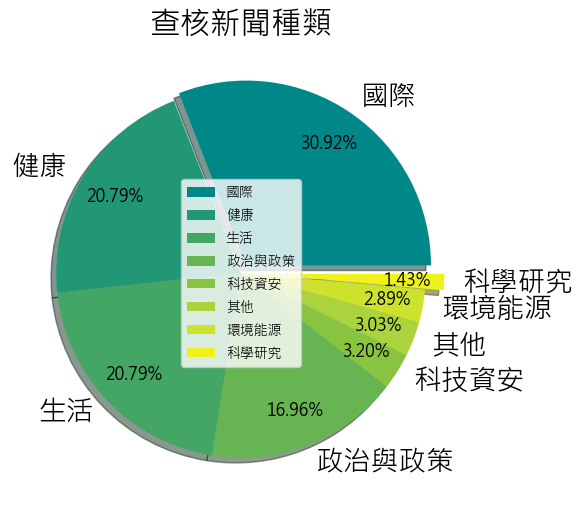

In [25]:
explo=[0.05 if i==max(newsType.values) else 0.1 if i==min(newsType.values) else 0 for i in newsType.values]
plt.figure(figsize=(6,6))
Pie=plt.pie(newsType,labels=newsType.index,shadow=True,autopct="%.2f%%",\
            explode=explo,colors=colors,pctdistance=0.8)

for i in Pie[1]:
    i.set_color("black")
    i.set_fontsize(20)
for i in Pie[2]:
    i.set_color("black")
    i.set_fontsize(12)

plt.title('查核新聞種類',fontsize=22)
plt.legend(loc=10)
plt.savefig('TFCnews_2024-07-05_page_1-309.png',bbox_inches='tight')

plt.show()

### 新聞審核結果

In [26]:
newsResult=df.groupby('result').size().sort_values(ascending=False)
newsResult

result
錯誤        2474
部分錯誤       375
事實釐清       218
證據不足        19
正確           3
事實查核報告       1
dtype: int64